# Dataset COCO2017

In [18]:
# import
import torch
import torch.nn as nn
import timm
import torchvision
import torchvision.transforms as transforms
from torchvision.models.detection import FasterRCNN
from torchvision.transforms import ToTensor
from torchvision.models.detection.backbone_utils import BackboneWithFPN
from torchvision.models.detection.rpn import AnchorGenerator
from torchvision.models.detection import FasterRCNN

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.patches as patches
import json

In [19]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [20]:
# Convertir en tensor et normaliser + data augmentation
mean = torch.tensor([123.675/255.0, 116.28/255.0, 103.53/255.0])
std  = torch.tensor([58.395/255.0, 57.12/255.0, 57.375/255.0])

transform_train = transforms.Compose([
    # transforms.RandomCrop(128, padding=4),
    # transforms.RandomHorizontalFlip(0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

In [21]:
from torchvision.datasets import CocoDetection

train_set = CocoDetection(
    root=r"C:\Users\Utilisateur\Simplon\dataset_COCO\train2017",
    annFile=r"C:\Users\Utilisateur\Simplon\dataset_COCO\annotations\instances_train2017.json",
    transform=transform_train
    )

test_set = CocoDetection(
    root=r"C:\Users\Utilisateur\Simplon\dataset_COCO\val2017",
    annFile=r"C:\Users\Utilisateur\Simplon\dataset_COCO\annotations\instances_val2017.json",
    transform=transform_train
    )


trainloader = torch.utils.data.DataLoader(train_set, batch_size=32,
                                          shuffle=True)

testloader = torch.utils.data.DataLoader(test_set, batch_size=32,
                                         shuffle=False)

loading annotations into memory...
Done (t=11.93s)
creating index...
index created!
loading annotations into memory...
Done (t=0.43s)
creating index...
index created!


In [22]:
coco_labels_path = r"C:\Users\Utilisateur\Simplon\dataset_COCO\annotations\instances_val2017.json"
with open(coco_labels_path) as f:
    coco_json = json.load(f)

categories = {cat['id']: cat['name'] for cat in coco_json['categories']}
print(categories)

{1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus', 7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light', 11: 'fire hydrant', 13: 'stop sign', 14: 'parking meter', 15: 'bench', 16: 'bird', 17: 'cat', 18: 'dog', 19: 'horse', 20: 'sheep', 21: 'cow', 22: 'elephant', 23: 'bear', 24: 'zebra', 25: 'giraffe', 27: 'backpack', 28: 'umbrella', 31: 'handbag', 32: 'tie', 33: 'suitcase', 34: 'frisbee', 35: 'skis', 36: 'snowboard', 37: 'sports ball', 38: 'kite', 39: 'baseball bat', 40: 'baseball glove', 41: 'skateboard', 42: 'surfboard', 43: 'tennis racket', 44: 'bottle', 46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife', 50: 'spoon', 51: 'bowl', 52: 'banana', 53: 'apple', 54: 'sandwich', 55: 'orange', 56: 'broccoli', 57: 'carrot', 58: 'hot dog', 59: 'pizza', 60: 'donut', 61: 'cake', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed', 67: 'dining table', 70: 'toilet', 72: 'tv', 73: 'laptop', 74: 'mouse', 75: 'remote', 76: 'keyboard', 77: 'cell phone', 78: 'micro

In [23]:
N = 5

for i in range(N):
    print(train_set[i][1][0]["bbox"], train_set[i][1][0]["category_id"], categories[train_set[i][1][0]["category_id"]])

[1.08, 187.69, 611.59, 285.84] 51 bowl
[385.53, 60.03, 214.97, 297.16] 25 giraffe
[204.86, 31.02, 254.88, 324.12] 64 potted plant
[0.96, 20.06, 441.23, 379.15] 24 zebra
[0.0, 50.12, 457.68, 430.35] 28 umbrella


202.94 185.68 306.25 228.54
194.8 218.48 147.44 228.16
123.86 191.61 331.07 120.78
203.87 35.42 433.61 294.47
120.27 106.91 274.9 286.35


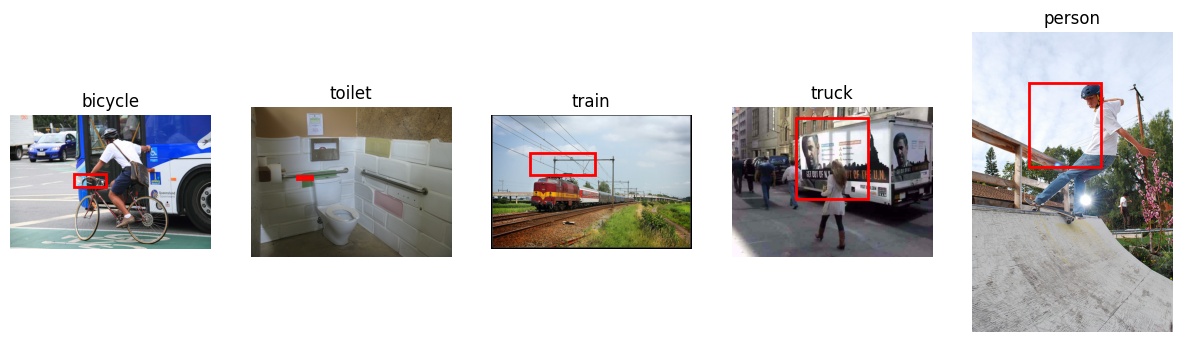

In [24]:
N = 5

def show_images(N, dataset):
    fig, axes = plt.subplots(1, N, figsize=(15, 5))

    for i in range(N):
        idx = np.random.randint(0, len(dataset))
        
        img_tensor, target = dataset[idx]  # CocoDetection returne (image, target)
        box = target[0]["bbox"]
        x1, y1, x2, y2 = box[0], box[1], box[2], box[3]  # float числа
        print(x1, y1, x2, y2)
        rect = patches.Rectangle(
            (x1, y1), x2 - x1, y2 - y1,
            linewidth=2, edgecolor='r', facecolor='none'
        )
        label = categories[target[0]['category_id']]

        img = img_tensor.clone() 
        img = img * std[:, None, None] + mean[:, None, None]  # обратная нормализация
        img = img.clamp(0, 1)  # значения в диапазоне [0,1]
        img = img.permute(1, 2, 0).numpy()  # C,H,W -> H,W,C
        axes[i].add_patch(rect)
        axes[i].imshow(img)

        axes[i].set_title(label if target else 'None')  
        axes[i].axis('off')

    plt.show()


show_images(N, train_set)